# YOLOV8 姿態偵測
抓出人，並且標示出他的骨架  
*在這一篇筆記中沒有訓練部份，我自己測試時該權重以可以應對白天大多數狀況

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.7/644.7 kB 9.8 MB/s eta 0:00:00


# Predict
似曾相似？ultralytics中所有任務（分類 物件偵測 姿態偵測 語義分割）都是使用一樣的載入與推論方法

In [2]:
from ultralytics import YOLO
from PIL import Image
# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model
# Predict with the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|██████████| 6.51M/6.51M [00:00<00:00, 77.0MB/s]

100%|██████████| 476k/476k [00:00<00:00, 12.2MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 404.2ms
Speed: 25.2ms preprocess, 404.2ms inference, 36.9ms postprocess per image at shape (1, 3, 640, 480)


在進行推論完之後模型會輸出boxes與keypoints  
box中包含物件框  
keypoint包含姿態點
以下是圖例（資料來源：https://stackoverflow.com/questions/76237059/how-to-transform-the-skeleton-keyppints-from-ntu-format-to-coco-format）  

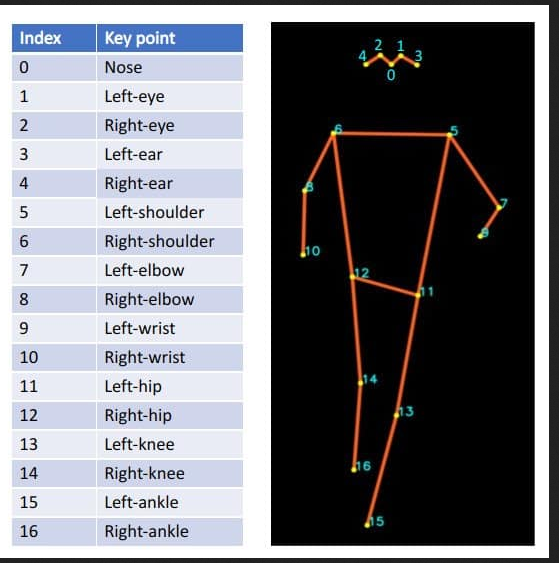

In [3]:
for result in results:

    im_array = result.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    #im.show()  # show image
    im.save('results.jpg')  # save image
    print(result.keypoints)
    print(result.boxes)

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9803, 0.9045, 0.9619, 0.4214, 0.8145, 0.9860, 0.9896, 0.9528, 0.9695, 0.9332, 0.9532, 0.9936, 0.9943, 0.9881, 0.9897, 0.9473, 0.9509],
        [0.3290, 0.3812, 0.1012, 0.4702, 0.0773, 0.7276, 0.3672, 0.6556, 0.1500, 0.5501, 0.1800, 0.7120, 0.5182, 0.7897, 0.6158, 0.6599, 0.5291],
        [0.9791, 0.9173, 0.9580, 0.6426, 0.8594, 0.9929, 0.9963, 0.9587, 0.9806, 0.9323, 0.9598, 0.9976, 0.9981, 0.9948, 0.9963, 0.9784, 0.9826],
        [0.0141, 0.0105, 0.0073, 0.0430, 0.0262, 0.1541, 0.0851, 0.3166, 0.1467, 0.2782, 0.1496, 0.3280, 0.2620, 0.2317, 0.1889, 0.1235, 0.1075]])
data: tensor([[[1.4337e+02, 4.4484e+02, 9.8033e-01],
         [1.4827e+02, 4.3567e+02, 9.0446e-01],
         [1.3206e+02, 4.3629e+02, 9.6188e-01],
         [0.0000e+00, 0.0000e+00, 4.2136e-01],
         [1.0457e+02, 4.4318e+02, 8.1452e-01],
         [1.6294e+02, 4.9544e+02, 9.8596e-01],
         [8.7641e+01, 4.9777e+02, 9.8956e-01],
         [1.